# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

##### Take a look of the data

In [20]:
print (data.groupby('call').race.describe())
print (data.groupby('race').race.describe())

     count unique top  freq
call                       
0.0   4478      2   b  2278
1.0    392      2   w   235
     count unique top  freq
race                       
b     2435      1   b  2435
w     2435      1   w  2435


In [81]:
data_new = data.loc[:,['race', 'call']]
print (data_new.head())


  race  call
0    w   0.0
1    w   0.0
2    b   0.0
3    b   0.0
4    w   0.0


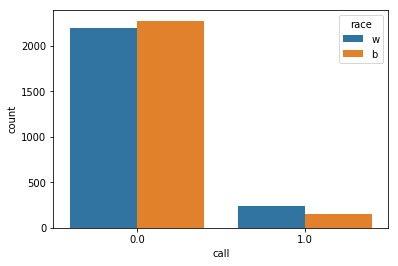

In [31]:
import seaborn as sns
sns.countplot(x = 'call', hue='race', data = data, order = data['call'].value_counts().index)

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


##### 1. What test is appropriate for this problem? Does CLT apply?
##### 2. What are the null and alternate hypotheses?

<div class="span5 alert alert-success">
<p> 1. The test that we can use for this problem is the two-sample t-test because this statistical analysis is designed to test if there is a difference between two means from two different populations. <p> Yes, we can apply CLT because the sample size is large (n=4870) and  each observation doesn't depend on the values of the other observations.
<p> 2. The null hypotheses: the race doesn't have a significant impact on the callbacks. </p>
   The alternate hypotheses: the race has importance in the process of the selection of a candidate. </p>
</div>

In [26]:
w = data[data.race=='w']
b = data[data.race=='b']

##### 3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [69]:
N1 = len(b.call)
N2 = len(w.call)

d1=N1-1
d2=N2-1
df = d1+d2 # degrees of freedom
#standard deviation
sd1 = np.std(w.call) 
sd2 = np.std(b.call) 
#mean
m1 = np.mean(b.call)
m2 = np.mean(w.call)
#callback rate
p1 = sum(b.call)/N1 
p2 = sum(w.call)/N2 


sp = np.sqrt((d1*sd1**2 + d2*sd2**2)/df)
se = sp*np.sqrt(1/N1 + 1/N2)

t_critical = stats.t.ppf(q = 0.975, df=df) #df is degrees of freedom (sample size minus 1) q = confidence interval 

std_N1N2 = np.sqrt(((N1 - 1)*(sd1)**2 + (N2 - 1)*(sd2)**2) / df) 
margin_of_error = t_critical * std_N1N2 * np.sqrt(1/N1 + 1/N2)

print ("Margin of error:")
print (margin_of_error)

print("Confidence Interval:")
print("95% CI ",stats.t.interval(0.95, df, loc=m2-m1, scale=se))

print("Two sample t-test:")
print (stats.ttest_ind(b.call, w.call))   


Margin of error:
0.015258797951013668
Confidence Interval:
95% CI  (0.01677405690404691, 0.047291652806074246)
Two sample t-test:
Ttest_indResult(statistic=-4.114705290861751, pvalue=3.940802103128886e-05)


In [71]:
#To control the margin of error
diffMean = m2 - m1
print (diffMean - margin_of_error, diffMean + margin_of_error)

0.01677405690404691 0.047291652806074246


In [86]:
#Bootstrapping approach

call_race=np.concatenate((w.call,b.call))

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# Take 10,000 bootstrap replicates of the mean
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(call_race, np.mean)
    
    
# Compute the 95% confidence interval
conf_int_95 = np.percentile(bs_replicates, [2.5, 97.5])
print ("The 95% confidence interval is: " + str(conf_int_95))

The 95% confidence interval is: [0.07289527 0.08809035]


#### 4. Write a story describing the statistical significance in the context or the original problem.

<div class="span5 alert alert-success">
<p> The results show a p-value less than 0.05 and a confidence interval that doesn't include zero. So, we can reject the null hypotheses and we can suppose that the race has a statistically significant impact on the callbacks.
      </p>
</div>

#### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

<div class="span5 alert alert-success">
<p> No, I can't affirm that the race is the most important factor in callback success after my analysis because I only consider this factor and not the other ones (like education, sex, etc.) that could be also important and more relevant. I could examine the other factor, compare the results, and also see the correlation between them using the regression.  </p>
</div>